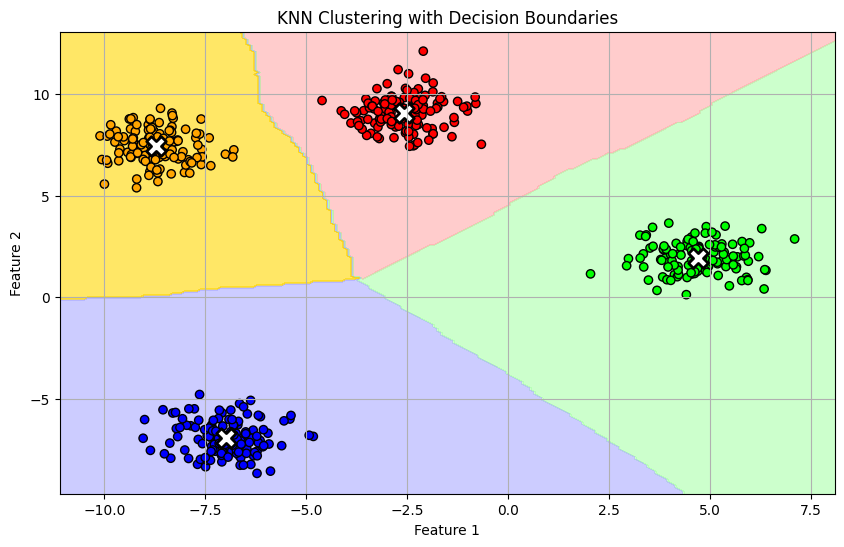

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Generate synthetic data for clustering
np.random.seed(42)
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFA500'])

plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_background)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, edgecolor='k')

# Mark cluster centers
centers = knn.predict(knn._fit_X)
unique_classes = np.unique(y)
for cls in unique_classes:
    center_points = knn._fit_X[centers == cls]
    center = center_points.mean(axis=0)
    plt.scatter(center[0], center[1], s=200, c='white', edgecolor='k', marker='X', linewidth=2)

plt.title("KNN Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()